In [1]:
from MNIST_ACAI import ACAI_autoencoder

hidden_dim = 400
latent_dim = 20
path = "./mnist_acai/"
acai = ACAI_autoencoder(hidden_dim=hidden_dim, latent_dim=latent_dim)
acai.decoder.load_weights(path+'decoder/')
acai.encoder.load_weights(path+'encoder/')
acai.critic.load_weights(path+'critic/')

Using TensorFlow backend.


In [2]:
import matplotlib.pyplot as plt 
import tensorflow as tf
import numpy as np 
from MNIST_utils import get_mnist_data
data = get_mnist_data()

In [3]:
# Parameters 
d1_idx = 15
d2_idx = 3

In [4]:
d1 = data[d1_idx, :, :]
d2 = data[d2_idx, :, :]

# Original Digits

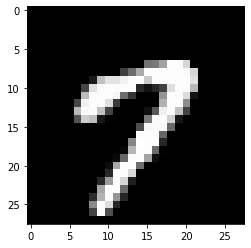

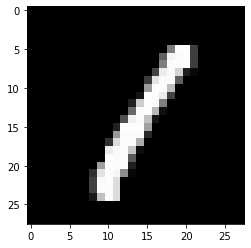

In [5]:
plt.figure()
plt.imshow(d1, cmap='gray');
plt.figure()
plt.imshow(d2, cmap='gray');

# Reconstructing digits from autoencoder

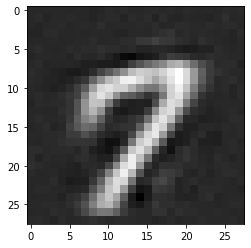

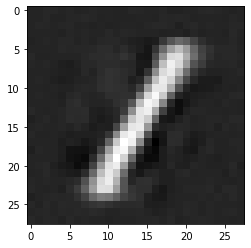

In [6]:
# Autoencoder's reconstruction 
d1z = acai.encoder(tf.reshape(d1, [1, 784]))
d2z = acai.encoder(tf.reshape(d2, [1, 784]))
d1_out = tf.reshape(acai.decoder(d1z), [1, 28, 28])
d2_out = tf.reshape(acai.decoder(d2z), [1, 28, 28])
#print(d1_out)
plt.figure()
plt.imshow(d1_out[0, :, :], cmap='gray');
plt.figure()
plt.imshow(d2_out[0, :, :], cmap='gray');

# Interpolating between 0 and 4

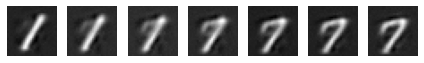

In [10]:
# Interpolating
nplots = 7
alphas = np.linspace(0.1, 0.9, nplots)
fig, axis = plt.subplots(1, nplots)

for i in range(nplots):
    alpha = alphas[i]
    dmixz = d1z * alpha + (1 - alpha) * d2z
    dmix_out = tf.reshape(acai.decoder(dmixz), [1, 28, 28])
    axis[i].imshow(dmix_out[0, :, :], cmap='gray');
    axis[i].axis('off')
fig.tight_layout()
fig.savefig("test.pdf")

In [8]:
# Plotting model 
from tensorflow.keras.layers import Dense

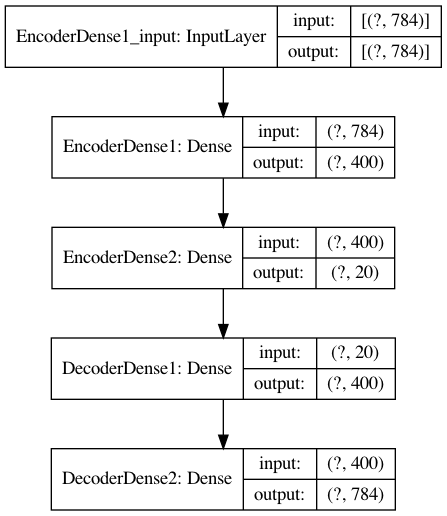

In [9]:
acai_exmaple = tf.keras.models.Sequential()
acai_exmaple.add(Dense(hidden_dim, activation='relu', input_shape=(784,), name='EncoderDense1'))
acai_exmaple.add(Dense(latent_dim, name='EncoderDense2'))
acai_exmaple.add(Dense(hidden_dim, activation='relu', name='DecoderDense1'))
acai_exmaple.add(Dense(784, name='DecoderDense2'))
tf.keras.utils.plot_model(acai_exmaple, to_file="model.png", show_shapes=True, show_layer_names=True)